### Hierarchical Agglomerative Clustering I

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from ipywidgets import interact

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# matplotlib 한글설정

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name)
else:
    rc('font',family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# mobile 게임 이용자 data
# 1) 5점척도로 재정리
mobile_df = pd.read_csv('ATG_mp_score_reset.csv')
mobile_df

,panel_id,gender,age,액션_time,액션_appcount,스포츠_time,스포츠_appcount,퍼즐_time,퍼즐_appcount,캐주얼게임_time,...,K0034,K0035,K0036,K0037,K0038,K0039,K0040,K0041,K0042,age_by_10
0,A0004703,1,48,5,5,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,4
1,H0004505,1,59,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,5
2,H0001465,2,21,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
3,H0005126,1,58,0,0,0,0,3,4,0,...,1,1,0,0,1,0,0,0,1,5
4,H0009852,2,22,0,0,0,0,4,4,5,...,0,0,0,0,0,1,1,0,1,2
5,H0008768,2,30,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,2
6,A0005444,2,48,0,0,0,0,0,0,5,...,0,0,0,0,0,1,0,0,0,4
7,H0004053,2,57,0,0,0,0,0,0,5,...,0,0,0,0,0,1,0,0,1,5
8,H0017216,1,39,0,0,0,0,4,2,0,...,0,0,0,0,0,0,0,1,0,3
9,H0021446,1,34,0,0,1,1,0,0,4,...,0,0,0,1,0,0,0,0,0,3


Hierarchical Clustering

In [4]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
mobile_df = pd.read_csv('ATG_mp_score_reset.csv')
mobile_df.shape

(10320, 47)

In [6]:
# 사용할 X컬럼을 지정한다
features = ['gender', 'age', '액션_time', '액션_appcount', '스포츠_time',
       '스포츠_appcount', '퍼즐_time', '퍼즐_appcount', '캐주얼게임_time',
       '캐주얼게임_appcount', '단어_time', '단어_appcount', '교육_time', '교육_appcount',
       '퀴즈_time', '퀴즈_appcount', '롤플레잉_time', '롤플레잉_appcount', '아케이드_time',
       '아케이드_appcount', '전략_time', '전략_appcount', '어드벤처_time', '어드벤처_appcount',
       '카드_time', '카드_appcount', '시뮬레이션_time', '시뮬레이션_appcount', '보드_time',
       '보드_appcount', '자동차경주_time', '자동차경주_appcount', '음악_time', '음악_appcount',
       '카지노_time', '카지노_appcount']

In [7]:
import scipy.cluster.hierarchy as shc
import time
from sklearn.manifold import TSNE

In [8]:
import os
os.chdir('C:\\Users\\요우용\\Desktop\\엠브레인_경진대회\\엠브레인 경진대회\\clusters_by_time')

### 1) mobile 롤플레잉 player

#### 1-2) 롤플레잉_time 기준

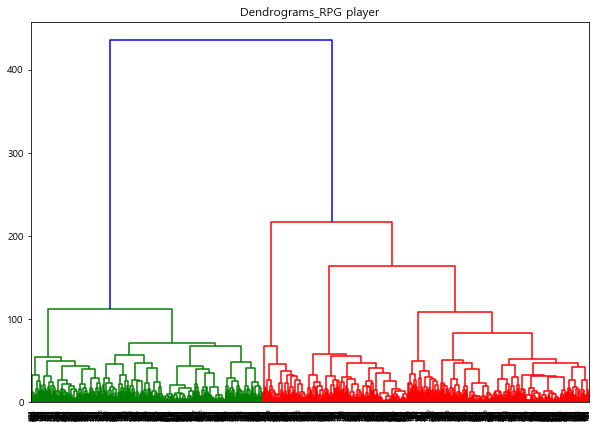

In [10]:
## rpg_df = mobile_df[mobile_df.롤플레잉_time>=1]
rpg_df = mobile_df[mobile_df.롤플레잉_time>=1]
plt.figure(figsize=(10,7))
plt.title('Dendrograms_RPG player')
dend = shc.dendrogram(shc.linkage(rpg_df[features], method='ward'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2218 samples in 0.005s...
[t-SNE] Computed neighbors for 2218 samples in 0.281s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2218
[t-SNE] Computed conditional probabilities for sample 2000 / 2218
[t-SNE] Computed conditional probabilities for sample 2218 / 2218
[t-SNE] Mean sigma: 2.282209
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.243256
[t-SNE] KL divergence after 300 iterations: 1.665660


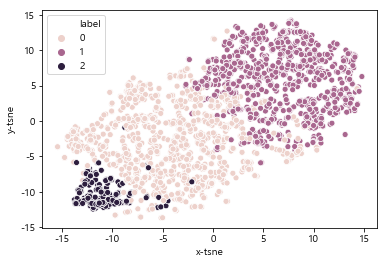

In [11]:
#  cluster = 3

#위에서 적절한 cluster 갯수 파악 -> n_clusters 갯수 조정해보기
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
c_label = cluster.fit_predict(rpg_df[features])

rpg_df2 = rpg_df[features]
rpg_df2['label'] = c_label

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(rpg_df2[features].values)

df_tsne = rpg_df2.copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

sns.scatterplot(x='x-tsne',y='y-tsne',hue='label',data=df_tsne)
plt.show()

In [37]:
rpg_df2.to_csv('rpg_clusters.csv',index=False)

### 2) mobile 전략/시뮬레이션 player

#### 2-2) 전략+시뮬_time 기준

In [38]:
strat_df = mobile_df.loc[(mobile_df.전략_time>=1) | (mobile_df.시뮬레이션_time>=1),:]

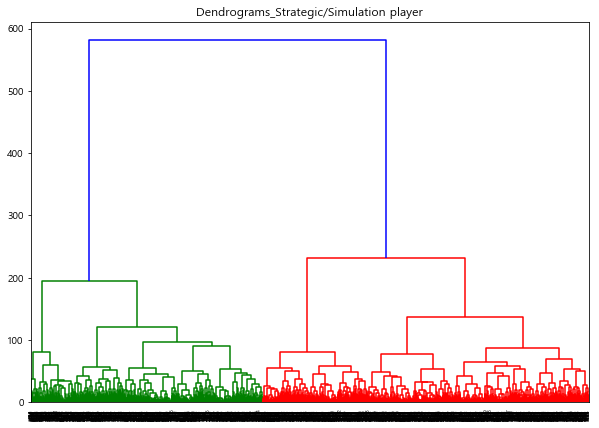

In [14]:
# strat_df = mobile_df.loc[(mobile_df.전략_time>=1) | (mobile_df.시뮬레이션_time>=1),:]
plt.figure(figsize=(10,7))
plt.title('Dendrograms_Strategic/Simulation player')
dend = shc.dendrogram(shc.linkage(strat_df[features], method='ward'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2929 samples in 0.006s...
[t-SNE] Computed neighbors for 2929 samples in 0.742s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2929
[t-SNE] Computed conditional probabilities for sample 2000 / 2929
[t-SNE] Computed conditional probabilities for sample 2929 / 2929
[t-SNE] Mean sigma: 2.618029
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.320320
[t-SNE] KL divergence after 300 iterations: 1.815855


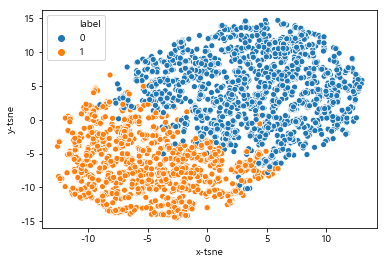

In [39]:
#  cluster = 2

#위에서 적절한 cluster 갯수 파악 -> n_clusters 갯수 조정해보기
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
c_label = cluster.fit_predict(strat_df[features])

strat_df2 = strat_df[features]
strat_df2['label'] = c_label

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(strat_df[features].values)

df_tsne = strat_df2.copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

sns.scatterplot(x='x-tsne',y='y-tsne',hue='label',data=df_tsne)
plt.show()

In [40]:
strat_df2.to_csv('strsim_clusters.csv',index=False)

#### 2-3) 전략_time만

In [41]:
strat_df = mobile_df.loc[(mobile_df.전략_time>=1),:]

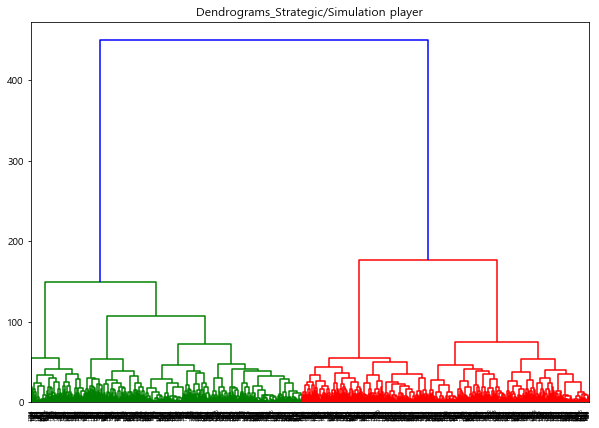

In [20]:
# strat_df = mobile_df.loc[(mobile_df.전략_time>=1) | (mobile_df.시뮬레이션_time>=1),:]
plt.figure(figsize=(10,7))
plt.title('Dendrograms_Strategic/Simulation player')
dend = shc.dendrogram(shc.linkage(strat_df[features], method='ward'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1542 samples in 0.002s...
[t-SNE] Computed neighbors for 1542 samples in 0.236s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1542
[t-SNE] Computed conditional probabilities for sample 1542 / 1542
[t-SNE] Mean sigma: 2.690348
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.257339
[t-SNE] KL divergence after 300 iterations: 1.331179


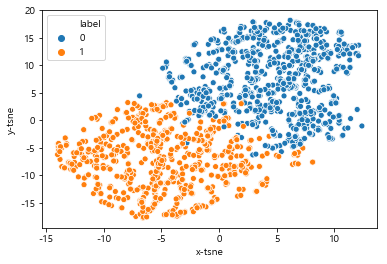

In [42]:
#  cluster = 2

#위에서 적절한 cluster 갯수 파악 -> n_clusters 갯수 조정해보기
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
c_label = cluster.fit_predict(strat_df[features])

strat_df2 = strat_df[features]
strat_df2['label'] = c_label

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(strat_df[features].values)

df_tsne = strat_df2.copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

sns.scatterplot(x='x-tsne',y='y-tsne',hue='label',data=df_tsne)
plt.show()

In [43]:
strat_df2.to_csv('only_strat_clusters.csv',index=False)

#### 2-4) 시뮬레이션_time만

In [44]:
strat_df = mobile_df.loc[(mobile_df.시뮬레이션_time>=1),:]

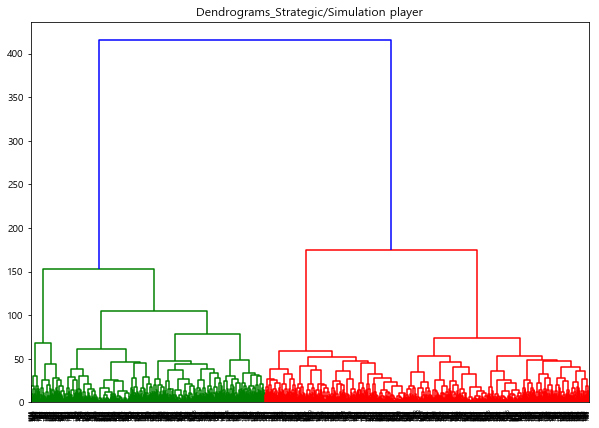

In [24]:
# strat_df = mobile_df.loc[(mobile_df.전략_time>=1) | (mobile_df.시뮬레이션_time>=1),:]
plt.figure(figsize=(10,7))
plt.title('Dendrograms_Strategic/Simulation player')
dend = shc.dendrogram(shc.linkage(strat_df[features], method='ward'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1737 samples in 0.004s...
[t-SNE] Computed neighbors for 1737 samples in 0.188s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1737
[t-SNE] Computed conditional probabilities for sample 1737 / 1737
[t-SNE] Mean sigma: 2.794770
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.104179
[t-SNE] KL divergence after 300 iterations: 1.538122


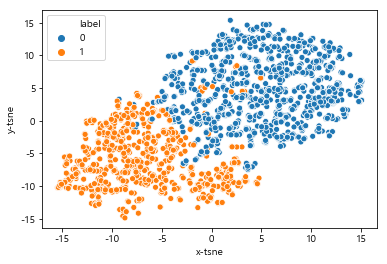

In [47]:
#  cluster = 2

#위에서 적절한 cluster 갯수 파악 -> n_clusters 갯수 조정해보기
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
c_label = cluster.fit_predict(strat_df[features])

strat_df2 = strat_df[features]
strat_df2['label'] = c_label

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(strat_df[features].values)

df_tsne = strat_df2.copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

sns.scatterplot(x='x-tsne',y='y-tsne',hue='label',data=df_tsne)
plt.show()

In [48]:
strat_df2.to_csv('only_simul_clusters.csv',index=False)

### 3) mobile 보드/퍼즐 player

#### 3-2) 보드+퍼즐_time 기준

In [58]:
puzzle_df = mobile_df.loc[(mobile_df.보드_time>=1) | (mobile_df.퍼즐_time>=1),:]

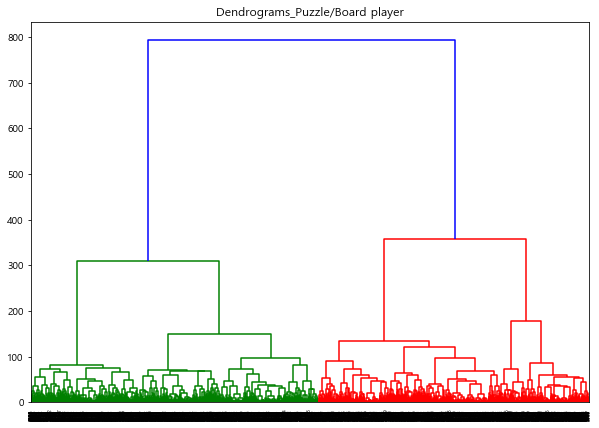

In [51]:
plt.figure(figsize=(10,7))
plt.title('Dendrograms_Puzzle/Board player')
dend = shc.dendrogram(shc.linkage(puzzle_df[features], method='ward'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4950 samples in 0.012s...
[t-SNE] Computed neighbors for 4950 samples in 1.457s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4950
[t-SNE] Computed conditional probabilities for sample 2000 / 4950
[t-SNE] Computed conditional probabilities for sample 3000 / 4950
[t-SNE] Computed conditional probabilities for sample 4000 / 4950
[t-SNE] Computed conditional probabilities for sample 4950 / 4950
[t-SNE] Mean sigma: 1.766290
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.457390
[t-SNE] KL divergence after 300 iterations: 2.129088


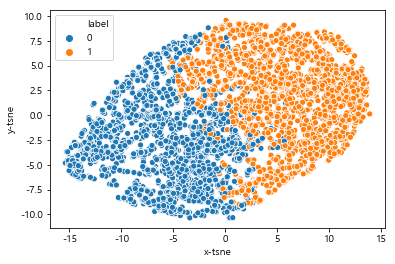

In [59]:
# 1-3-1) cluster = 2

#위에서 적절한 cluster 갯수 파악 -> n_clusters 갯수 조정해보기
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
c_label = cluster.fit_predict(puzzle_df[features])

puzzle_df2 = puzzle_df[features]
puzzle_df2['label'] = c_label

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(puzzle_df2[features].values)

df_tsne = puzzle_df2.copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

sns.scatterplot(x='x-tsne',y='y-tsne',hue='label',data=df_tsne)
plt.show()

In [61]:
puzzle_df2.to_csv('puzboard_clusters.csv',index=False)

#### 3-3) 퍼즐_time 기준

In [50]:
puzzle_df = mobile_df.loc[(mobile_df.퍼즐_time>=1),:]

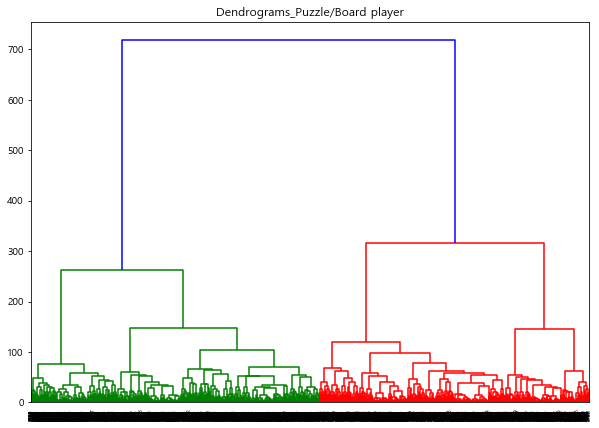

In [56]:
plt.figure(figsize=(10,7))
plt.title('Dendrograms_Puzzle/Board player')
dend = shc.dendrogram(shc.linkage(puzzle_df[features], method='ward'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.009s...
[t-SNE] Computed neighbors for 4000 samples in 0.943s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 1.690780
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.825546
[t-SNE] KL divergence after 300 iterations: 1.872523


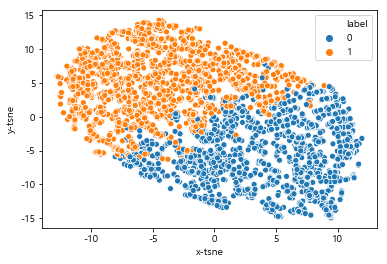

In [51]:
# 1-3-1) cluster = 2

#위에서 적절한 cluster 갯수 파악 -> n_clusters 갯수 조정해보기
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
c_label = cluster.fit_predict(puzzle_df[features])

puzzle_df2 = puzzle_df[features]
puzzle_df2['label'] = c_label

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(puzzle_df2[features].values)

df_tsne = puzzle_df2.copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

sns.scatterplot(x='x-tsne',y='y-tsne',hue='label',data=df_tsne)
plt.show()

In [52]:
puzzle_df2.to_csv('only_puzzle_clusters.csv',index=False)

#### 3-4) 보드_time 기준

In [53]:
puzzle_df = mobile_df.loc[(mobile_df.보드_time>=1),:]

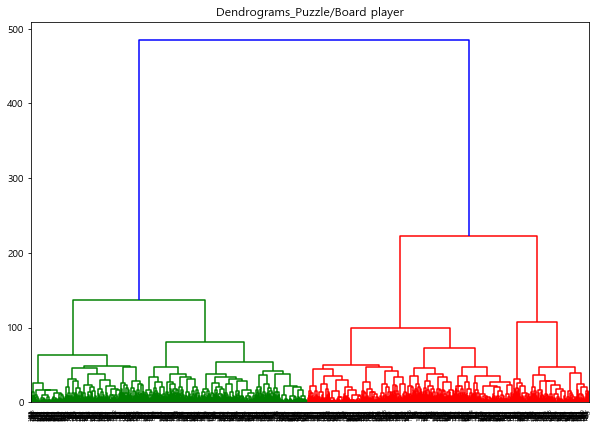

In [53]:
plt.figure(figsize=(10,7))
plt.title('Dendrograms_Puzzle/Board player')
dend = shc.dendrogram(shc.linkage(puzzle_df[features], method='ward'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1646 samples in 0.005s...
[t-SNE] Computed neighbors for 1646 samples in 0.172s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1646
[t-SNE] Computed conditional probabilities for sample 1646 / 1646
[t-SNE] Mean sigma: 2.710799
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.041527
[t-SNE] KL divergence after 300 iterations: 1.351566


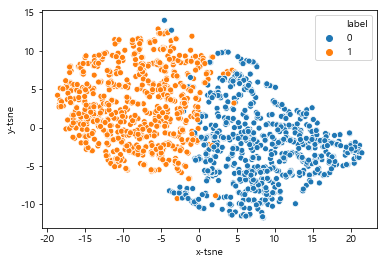

In [54]:
# 1-3-1) cluster = 2

#위에서 적절한 cluster 갯수 파악 -> n_clusters 갯수 조정해보기
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
c_label = cluster.fit_predict(puzzle_df[features])

puzzle_df2 = puzzle_df[features]
puzzle_df2['label'] = c_label

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(puzzle_df2[features].values)

df_tsne = puzzle_df2.copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

sns.scatterplot(x='x-tsne',y='y-tsne',hue='label',data=df_tsne)
plt.show()

In [57]:
puzzle_df2.to_csv('only_board_clusters.csv',index=False)

### 4) mobile 캐주얼 player

#### 4-2) 캐주얼게임_time 기준

In [62]:
casual_df = mobile_df[mobile_df.캐주얼게임_time>=1]
casual_df.shape

(2576, 47)

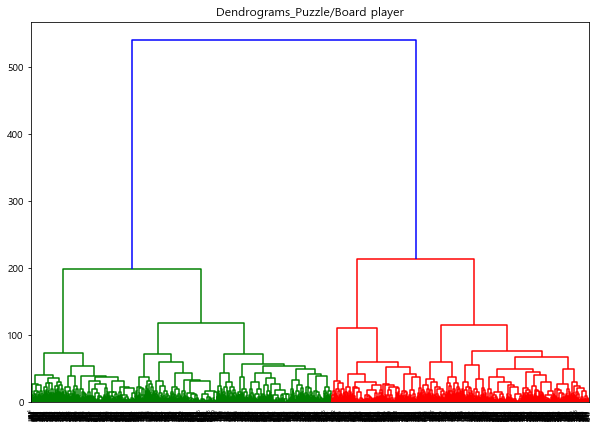

In [59]:
plt.figure(figsize=(10,7))
plt.title('Dendrograms_Puzzle/Board player')
dend = shc.dendrogram(shc.linkage(casual_df[features], method='ward'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2576 samples in 0.004s...
[t-SNE] Computed neighbors for 2576 samples in 0.553s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2576
[t-SNE] Computed conditional probabilities for sample 2000 / 2576
[t-SNE] Computed conditional probabilities for sample 2576 / 2576
[t-SNE] Mean sigma: 2.313504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.131065
[t-SNE] KL divergence after 300 iterations: 1.663477


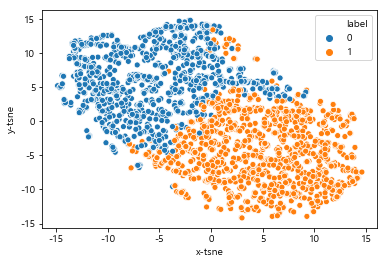

In [65]:
# 1-4-2) cluster = 2

#위에서 적절한 cluster 갯수 파악 -> n_clusters 갯수 조정해보기
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
c_label = cluster.fit_predict(casual_df[features])

casual_df2 = casual_df[features]
casual_df2['label'] = c_label

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(casual_df2[features].values)

df_tsne = casual_df2.copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

sns.scatterplot(x='x-tsne',y='y-tsne',hue='label',data=df_tsne)
plt.show()

In [66]:
casual_df2.to_csv('casual_clusters.csv',index=False)

### 5) mobile 어드벤처 player

#### Time 기준

In [10]:
adven_df = mobile_df[mobile_df.어드벤처_time>=1]
adven_df.shape

(1426, 47)

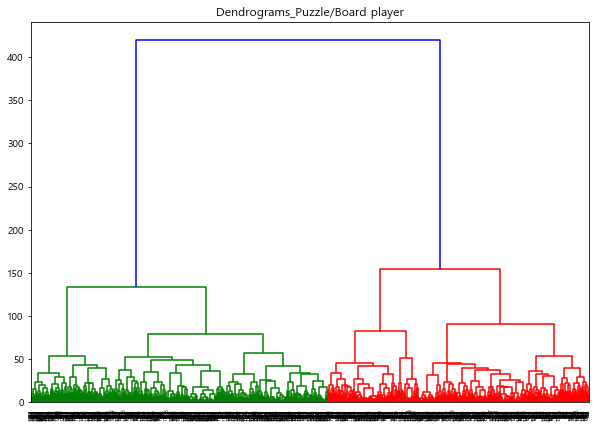

In [11]:
plt.figure(figsize=(10,7))
plt.title('Dendrograms_Puzzle/Board player')
dend = shc.dendrogram(shc.linkage(adven_df[features], method='ward'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1426 samples in 0.004s...
[t-SNE] Computed neighbors for 1426 samples in 0.149s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1426
[t-SNE] Computed conditional probabilities for sample 1426 / 1426
[t-SNE] Mean sigma: 2.902040
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.352341
[t-SNE] KL divergence after 300 iterations: 1.329646


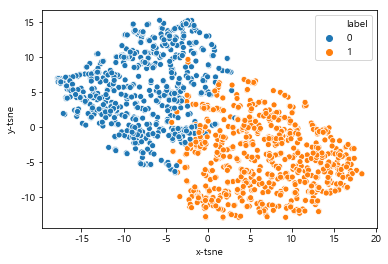

In [14]:
# 1-4-2) cluster = 2

#위에서 적절한 cluster 갯수 파악 -> n_clusters 갯수 조정해보기
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
c_label = cluster.fit_predict(adven_df[features])

adven_df2 = adven_df[features]
adven_df2['label'] = c_label

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(adven_df2[features].values)

df_tsne = adven_df2.copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

sns.scatterplot(x='x-tsne',y='y-tsne',hue='label',data=df_tsne)
plt.show()

In [15]:
adven_df2.to_csv('adven_clusters.csv',index=False)

### 6) mobile 아케이드 player

#### Time 기준

In [16]:
arcade_df = mobile_df[mobile_df.아케이드_time>=1]
arcade_df.shape

(2085, 47)

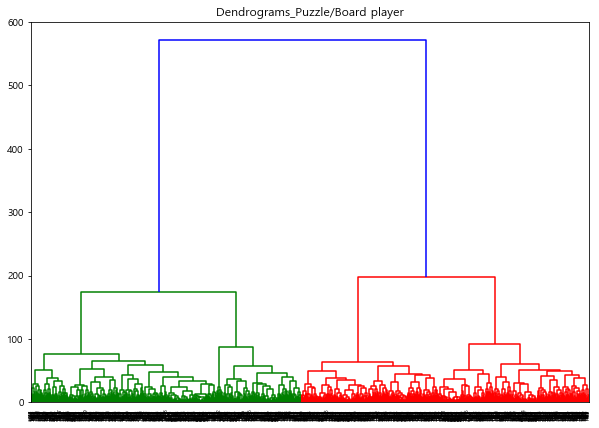

In [19]:
plt.figure(figsize=(10,7))
plt.title('Dendrograms_Puzzle/Board player')
dend = shc.dendrogram(shc.linkage(arcade_df[features], method='ward'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2085 samples in 0.003s...
[t-SNE] Computed neighbors for 2085 samples in 0.201s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2085
[t-SNE] Computed conditional probabilities for sample 2000 / 2085
[t-SNE] Computed conditional probabilities for sample 2085 / 2085
[t-SNE] Mean sigma: 2.761442
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.370903
[t-SNE] KL divergence after 300 iterations: 1.662126


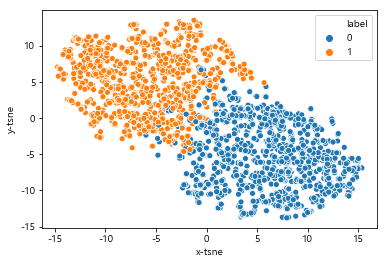

In [20]:
# 1-4-2) cluster = 2

#위에서 적절한 cluster 갯수 파악 -> n_clusters 갯수 조정해보기
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
c_label = cluster.fit_predict(arcade_df[features])

arcade_df2 = arcade_df[features]
arcade_df2['label'] = c_label

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(arcade_df2[features].values)

df_tsne =arcade_df2.copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

sns.scatterplot(x='x-tsne',y='y-tsne',hue='label',data=df_tsne)
plt.show()

In [21]:
arcade_df2.to_csv('arcade_clusters.csv',index=False)